pierwsza energia [meV]
3.7652134075688806
druga energia [meV]
33.88692066811993


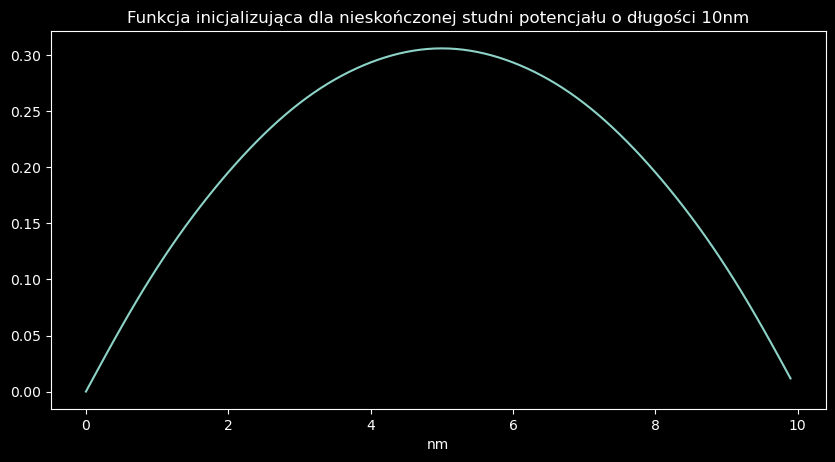

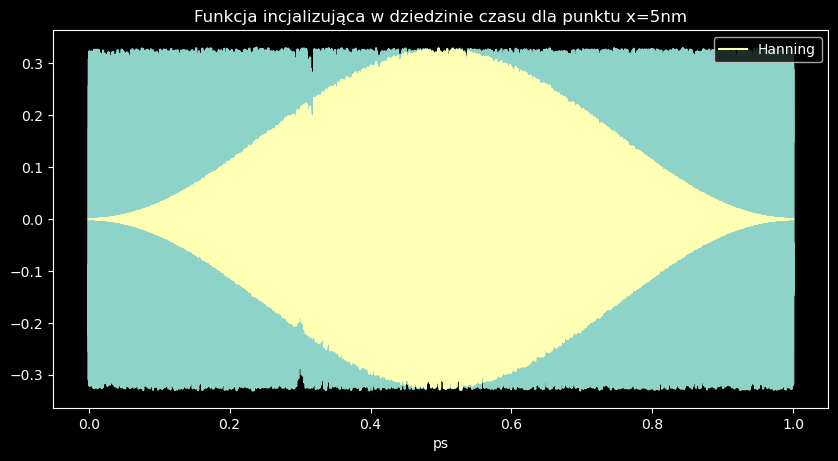

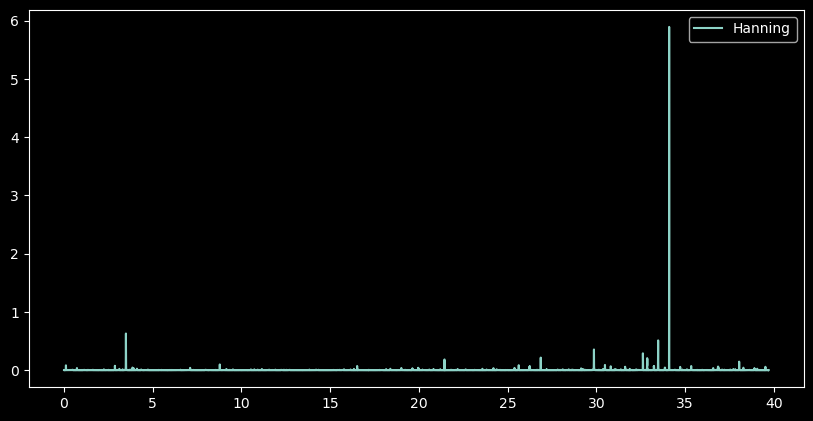

In [4]:
from scipy.fft import dct, idct
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack
import scipy.integrate as integrate
from scipy.signal import hanning
import sympy as sp
from numpy.fft import fft, ifft
import scipy
from scipy.signal import find_peaks
import warnings

warnings.filterwarnings("ignore")
plt.style.use('dark_background')


def nums(first_number, last_number, step=1):
    return range(first_number, last_number+1, step)
C = sp.Symbol('C', real = False)
h=1.054*10**(-34)
m=9.1*10**(-31)
a=10*10**(-9)
q= np.pi**2*h**2/(2*m*a**2)

e1= list(range(0,101))
for i in nums(0, 100):
    e1[i]=(i+1)**2*q/(1.6*10**(-22))
    
D= [None]*10
for i in nums(1, 10):
    if(i%2==0):
        D[i-1]=0
    else:
        D[i-1]=8*3.87/(i*np.pi)**3
x=sp.Symbol('x', real=True)
F= list(range(0,9))
phi=sp.Function('phi', real=True)

def phi(x): 
    b=0
    X=0
    for i in range(len(F)): 
        X+=D[i]*np.sqrt(1/10)*np.sin(10**(-9)*x*(i+1)*np.pi/a)
    b=X
    X=0
    return b
G= [None]*10
def Phi(t): 
    b=0
    X=0
    A1=0
    A2=0
    for i in range(len(F)): 
        X+=D[i]*np.exp(1j*(e1[i]/h)*t*10**12)*np.sqrt(1/10)*np.sin(10**(-9)*5*(i+1)*np.pi/a)
        A=D[i]*np.exp(1j*(e1[i]/h)*t*10**12)*np.sqrt(1/10)*np.sin(10**(-9)*5*(i+1)*np.pi/a)
        A1+= np.real(A)
        A2+= np.imag(A)
    b= A1 + 1j*A2
    X=0
    return b
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
x = np.arange(0, 10, 0.1)
y1 = phi(x)

ax.plot(x, y1)
ax.set_title("Funkcja inicjalizująca dla nieskończonej studni potencjału o długości 10nm")
ax.set_xlabel('nm')

fig, ax = plt.subplots(figsize=(10,5), dpi=100)
t = np.linspace(0,1,2**15)
y1 = Phi(t)
y1w = Phi(t)*scipy.signal.windows.hann(int(len(t)))
ax.plot(t, y1)
ax.plot(t, y1w, label="Hanning")
leg=ax.legend()


plt.style.use('dark_background')

ax.set_title("Funkcja incjalizująca w dziedzinie czasu dla punktu x=5nm")
ax.set_xlabel('Psi')
ax.set_xlabel('ps')
t2 = np.linspace(0,10,2**15)
leg=ax.legend()
df=3.052*10**6
dE=12.6*10**(-3)
N=2**15 
fig, ax = plt.subplots(figsize=(10,5), dpi=100)


freq = (np.fft.fftfreq(t2.size, d=dE))
freq2=np.abs(np.fft.fftshift(freq))
y2w = np.abs((np.fft.fft(y1*scipy.signal.windows.hann(int(len(freq2)))))**2)*10**(-6)
ax.plot(freq2, y2w, label="Hanning")
leg=ax.legend()
min_val=np.max(y2w)
bbb = np.where(x == min_val)


aaa=5.894
aaaa=0.627
print('pierwsza energia [meV]')
print(e1[0])
print('druga energia [meV]')
print(e1[2])